In [4]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.font_manager
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger("pypsa").setLevel(level=logging.CRITICAL) 

In [5]:
### read in data  !change the path so that it matches your file destination! 

In [57]:
models=['ICHEC','CNRM','MPI']
dfmodeldict={}
for model in models:
    # cap share
    df= pd.read_csv(f"/home/users/train037/group_5/data/cap_share_all_periods_model_{model}.csv")
    df=df.T
    df.columns = ['OCGT_share','offwind_share','onwind_share','ror_share','solar_share']
    df=df.iloc[1:]    
    df=df.astype('float')

    # cap factor
    df2=pd.read_csv(f"/home/users/train037/group_5/data/cap_factor_input_per_carrier_all_periods_{model}.csv")
    df2=df2.T
    df2.columns = ['offwind_capfactor','onwindcapfactor','ror_capfactor','solar_capfactor']
    df2=df2.iloc[1:]    
    df2=df2.astype('float')

    #gen share
    df3=pd.read_csv(f"/home/users/train037/group_5/data/gen_share_all_periods_model_{model}.csv")
    df3=df3.T
    df3.columns = ['OCGT_gen','offwind_gen','onwind_gen','ror_gen','solar_gen']
    df3=df3.iloc[1:]    
    df3=df3.astype('float')

    # lcoe per carrier
    df4=pd.read_csv(f"/home/users/train037/group_5/data/lceo_per_carrier_all_periods_model_{model}.csv")
    df4=df4.T
    df4.columns = ['OCGT_lcoe','offwind_lcoe','onwind_lcoe','ror_lcoe','solar_lcoe']
    df4=df4.iloc[1:]    
    df4=df4.astype('float')

    # lcoe total
    df5=pd.read_csv(f"/home/users/train037/group_5/data/lcoe_all_periods_model_{model}.csv")
    df5=df5.T
    df5.columns = ['lcoe_total']
    df5=df5.iloc[1:]    
    df5=df5.astype('float')

    # join dataframe
    matrixdf=df.join(df2)
    matrixdf=matrixdf.join(df3)
    matrixdf=matrixdf.join(df4)
    matrixdf=matrixdf.join(df5)

    # drop NaNs
    matrixdf=matrixdf.drop(labels='1994-2000', axis=0)

    # drop ror_share because it doesn't change and ror_lcoe because it's 0
    matrixdf=matrixdf.drop(labels='ror_share', axis=1)
    matrixdf=matrixdf.drop(labels='ror_lcoe', axis=1)
    
    dfmodeldict[model]=matrixdf.copy()



In [58]:
# unpack dataframes for each model

matrixdf_ICHEC=dfmodeldict['ICHEC']
matrixdf_CNRM=dfmodeldict['CNRM']
matrixdf_MPI=dfmodeldict['MPI']

In [ ]:
## create and plot correlation matrix

<AxesSubplot:>

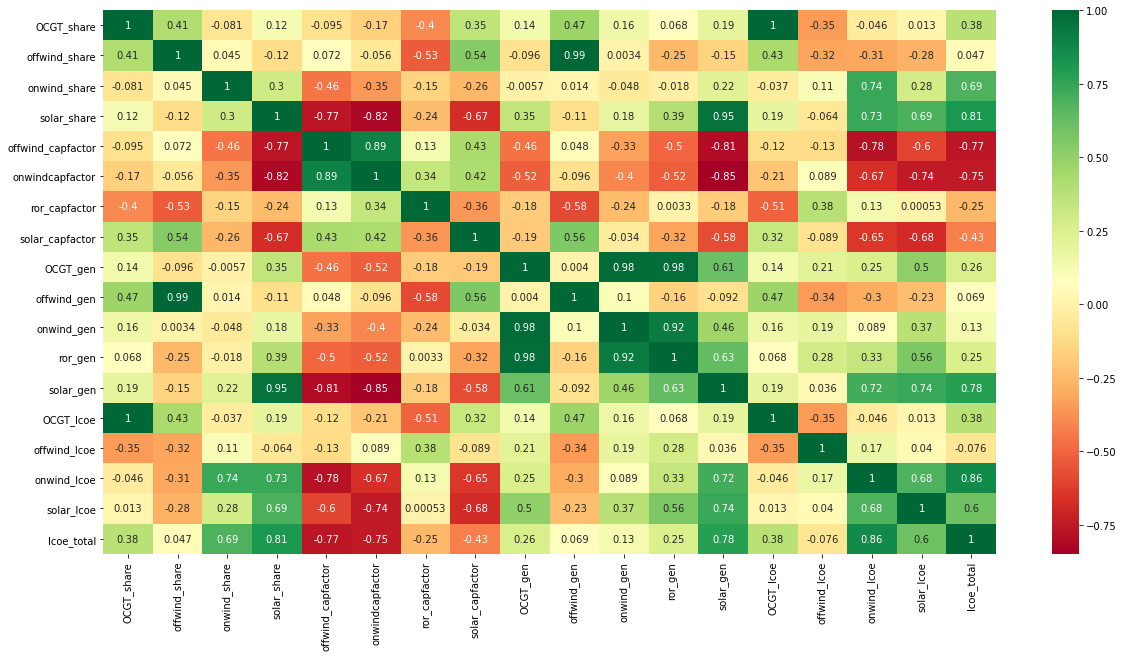

In [59]:
#ICHEC Model

corr_df = matrixdf_ICHEC.corr(method='pearson')
plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")

In [ ]:
## simple plots to check if the output is making sense
# for example since we see a correlation of 1 between OCGT_share and OCGT_lcoe, a plot has to show a straight upwards line.
# If it doesn't the correlation is calculated wrong.

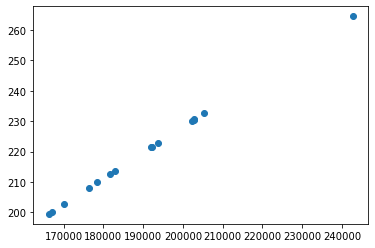

In [35]:
fig, ax = plt.subplots()
ax.scatter(matrixdf_ICHEC.OCGT_share, matrixdf_ICHEC.OCGT_lcoe)

In [ ]:
# --> Hurray! linear correlation of 1 is correct!

<AxesSubplot:title={'center':'ICHEC'}>

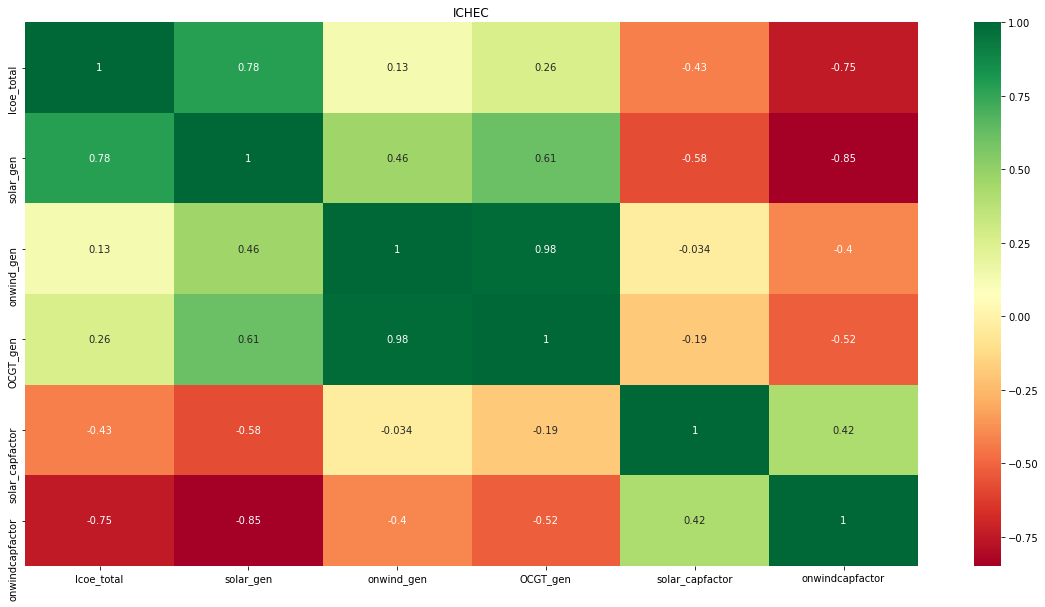

In [60]:
# ICHEC
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_ICHEC['lcoe_total']
focusdf['solar_gen']=matrixdf_ICHEC['solar_gen']
focusdf['onwind_gen']=matrixdf_ICHEC['onwind_gen']
focusdf['OCGT_gen']=matrixdf_ICHEC['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_ICHEC['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_ICHEC['onwindcapfactor']

corr_focus_ICHEC = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('ICHEC')
sns.heatmap(corr_focus_ICHEC, annot=True, cmap="RdYlGn")


<AxesSubplot:title={'center':'CNRM'}>

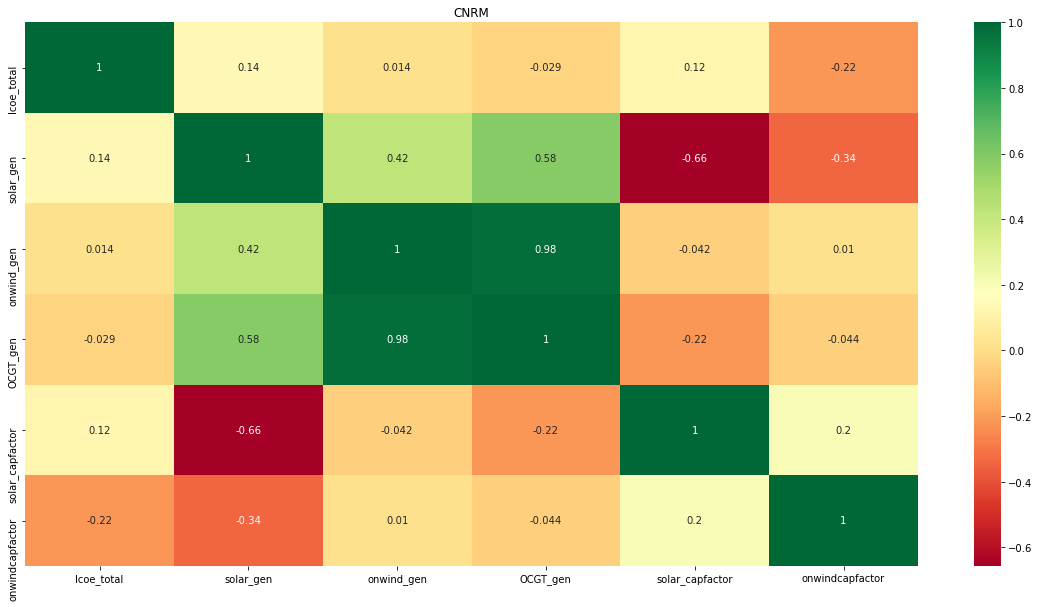

In [61]:
# CNRM
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_CNRM['lcoe_total']
focusdf['solar_gen']=matrixdf_CNRM['solar_gen']
focusdf['onwind_gen']=matrixdf_CNRM['onwind_gen']
focusdf['OCGT_gen']=matrixdf_CNRM['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_CNRM['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_CNRM['onwindcapfactor']

corr_focus_CNRM = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('CNRM')
sns.heatmap(corr_focus_CNRM, annot=True, cmap="RdYlGn")


<AxesSubplot:title={'center':'MPI'}>

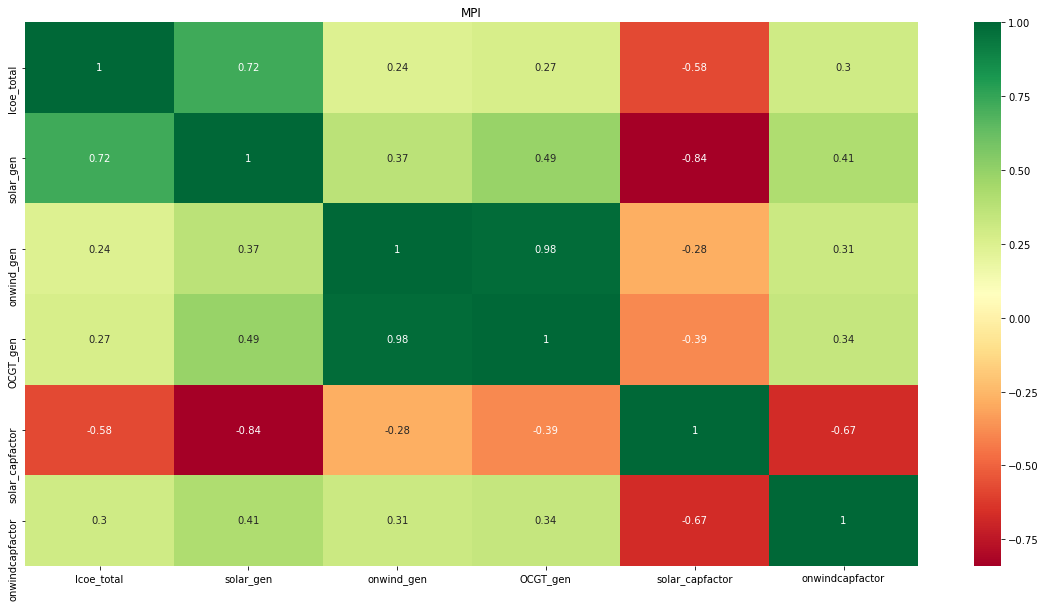

In [62]:
# MPI
focusdf=pd.DataFrame(index=[])
focusdf['lcoe_total']=matrixdf_MPI['lcoe_total']
focusdf['solar_gen']=matrixdf_MPI['solar_gen']
focusdf['onwind_gen']=matrixdf_MPI['onwind_gen']
focusdf['OCGT_gen']=matrixdf_MPI['OCGT_gen']
focusdf['solar_capfactor']=matrixdf_MPI['solar_capfactor']
focusdf['onwindcapfactor']=matrixdf_MPI['onwindcapfactor']

corr_focus_MPI = focusdf.corr(method='pearson')
plt.figure(figsize=(20, 10))
plt.title('MPI')
sns.heatmap(corr_focus_MPI, annot=True, cmap="RdYlGn")

In [63]:
testframe = pd.DataFrame(index=[])
testframe['onwind_gen_ICHEC']=matrixdf_ICHEC['onwind_gen']
testframe['onwind_gen_MPI']=matrixdf_MPI['onwind_gen']

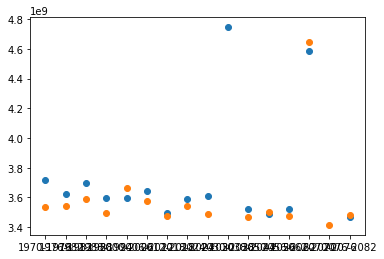

In [64]:
fig, ax = plt.subplots()
ax.scatter(testframe.index, testframe.onwind_gen_ICHEC, label='ICHEC')
ax.scatter(testframe.index, testframe.onwind_gen_MPI, label='MPI')